# 제품 데이터 분석(PDM) 분석과 분류

## 1. 분석 목적 정의

- 제품 생산 데이터를 활용하여 제품 생산 성공/실패 여부 분석
- 제품 생산 공정 개선

### 분석 프로세스
1. 분석 목표 정의
2. 데이터 전처리
3. EDA
4. ML 분석

### 활용 분석 모델
1. Clustering Algorithm
2. RandomForest, IsolationForest

In [1]:
# 결과에 영향을 주는 요인을 분석하기 위한 shapley value
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal, f_oneway
from scipy.stats import boxcox, norm
from scipy.stats import bartlett
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for sampling
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import shap
%matplotlib inline

## 2. Data Processing 1

### 2.1. Data Load

In [4]:
!pwd
path = "/content/drive/MyDrive/Data Analysis Projects/제품 데이터 분석(PDM) 분석과 분류"
random_state = 1234

/content


In [5]:
df = pd.read_csv(path + "/Data/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### 2.2. 중복 데이터 확인

In [6]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 0


## 3. EDA

### 3.1. Data Tyoe and Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
# categorical and numerical columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

UDI int64 [    1     2     3 ...  9998  9999 10000]
Product ID object ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Type object ['M' 'L' 'H']
Air temperature [K] float64 [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]
Process temperature [K] float64 [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7


In [9]:
list_cast_to_object = ["UDI", "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"]
for column_name in list_cast_to_object:
  df[column_name] = df[column_name].astype(object)

In [10]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numerical_columns = list(df.select_dtypes(include=['float64','int64']).columns)
target_column = "Machine failure"
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numerical_columns))

10000
14
9
5


In [11]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

---
**Summary**

총 변수: 14
- Numerical variables: 5
- Categorical variables: 9

전처리 후 데이터 수: 10,000

결측값 포함 필드: 0

중복 데이터 행: 0

### 3.2. 종속 변수 데이터 EDA

In [12]:
list_categorical_columns.remove(target_column)

In [13]:
df[target_column].describe()

count     10000
unique        2
top           0
freq       9661
Name: Machine failure, dtype: int64

In [14]:
df[target_column].value_counts()/10000*100

0    96.61
1     3.39
Name: Machine failure, dtype: float64

<Axes: xlabel='Machine failure', ylabel='count'>

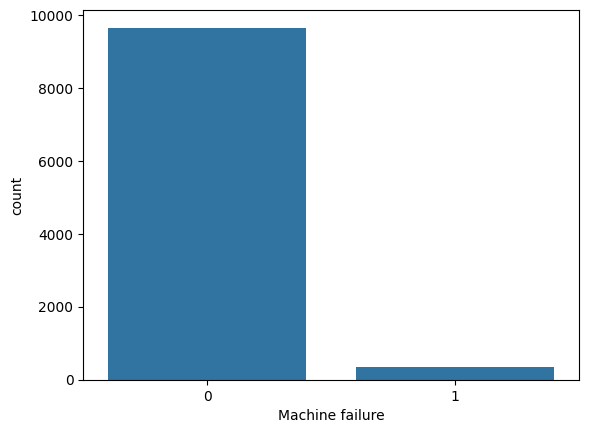

In [15]:
sns.countplot(x=target_column, data=df)

#### 문제 해결 접근법
1.   Imbalanced Data Set (Normal Classification with Sampling)
2.   Anomaly Detection (Anomaly Detection Classificaiton)



### 3.3. 독립 변수 데이터 EDA

#### 3.3.1. Categorical Data

In [16]:
# 불필요한 컬럼 확인
df[list_categorical_columns].nunique().sort_values()

TWF               2
HDF               2
PWF               2
OSF               2
RNF               2
Type              3
UDI           10000
Product ID    10000
dtype: int64

In [17]:
# UDI, Product ID는 unique id이므로 제거
df = df.drop(["UDI","Product ID"], axis=1)
list_categorical_columns.remove("UDI")
list_categorical_columns.remove("Product ID")

In [18]:
# TWF, HDF, PWF, OSF, RNF는 failure의 세부적인 값이기 때문에 이번 실습에서는 제거
# 즉, target(label)에 포함되므로 제거 필요.
df = df.drop(["TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)
list_categorical_columns.remove("TWF")
list_categorical_columns.remove("HDF")
list_categorical_columns.remove("PWF")
list_categorical_columns.remove("OSF")
list_categorical_columns.remove("RNF")

In [19]:
list_categorical_columns

['Type']

In [19]:
df["Type"]

<Axes: >

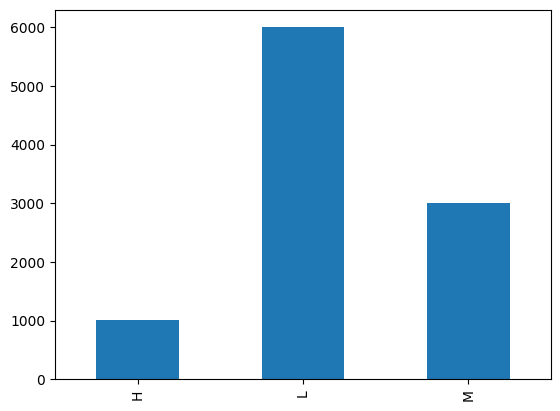

In [20]:
# Column별 분포 확인
df["Type"].value_counts().sort_index().plot(kind='bar')

In [21]:
# Target과 categorical 관계 분포 확인
pd.crosstab(df[target_column], df[list_categorical_columns[0]])

Type,H,L,M
Machine failure,,,
0,982,5765,2914
1,21,235,83


<Axes: xlabel='Machine failure'>

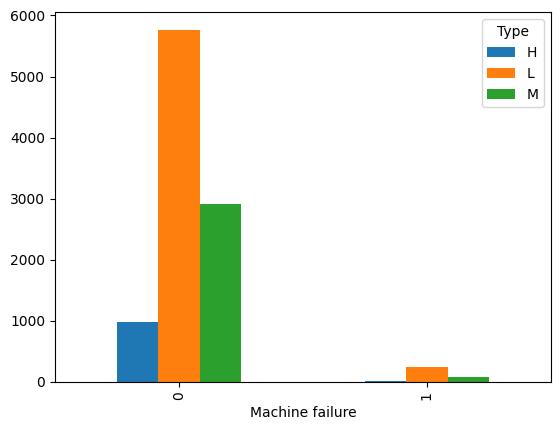

In [22]:
# categorical column과 dependent data(target column) 분포 분석
df_poutcome_dependent = pd.crosstab(df[target_column], df[list_categorical_columns[0]])
df_poutcome_dependent.plot(kind='bar')

# 애초에 target_column(y) 비중이 다르기 때문에, 아래와 같이 count 수를 비교하는 것은 데이터 분포를 파악하는데 적합하지 않음

In [23]:
pd.crosstab(df[target_column], df[list_categorical_columns[0]], normalize="index")

Type,H,L,M
Machine failure,,,
0,0.101646,0.596729,0.301625
1,0.061947,0.693215,0.244838


<Axes: xlabel='Machine failure'>

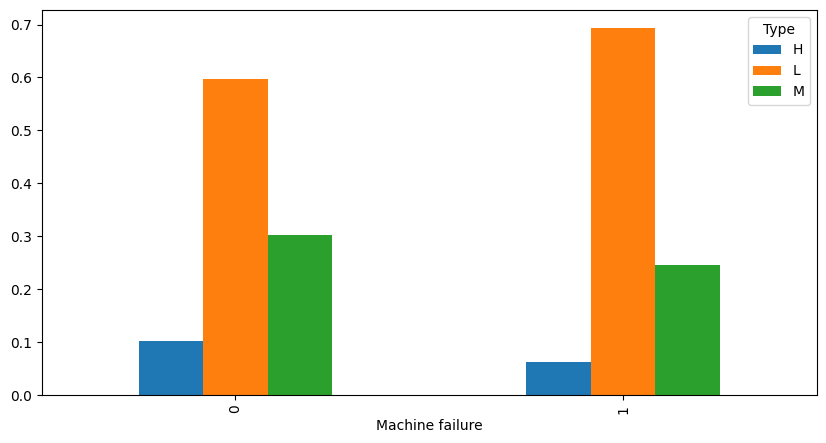

In [24]:
df_poutcome_dependent_ratio = pd.crosstab(df[target_column], df[list_categorical_columns[0]], normalize="index")
df_poutcome_dependent_ratio.plot.bar(figsize=(10,5))

In [25]:
# 카이제곱 검정
list_meaningful_column_by_chi = []
for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

Type ,  13.75171680114931 ,  0.0010324110359454081
all categorical columns :  1
selected columns by chi :  1 ['Type']


---
**Insight**
1. 대부분의 카테고리 변수는 failure(target label)에 포함되는 값들이기 때문에 제거 필요.
2. Type은 종속변수에 유의미한 관계를 갖는것으로 판단할 수 있음



#### 3.4. Numerical Data

In [26]:
# 불필요한 컬럼 확인
df[list_numerical_columns].nunique().sort_values()

Process temperature [K]     82
Air temperature [K]         93
Tool wear [min]            246
Torque [Nm]                577
Rotational speed [rpm]     941
dtype: int64

In [27]:
df[list_numerical_columns].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


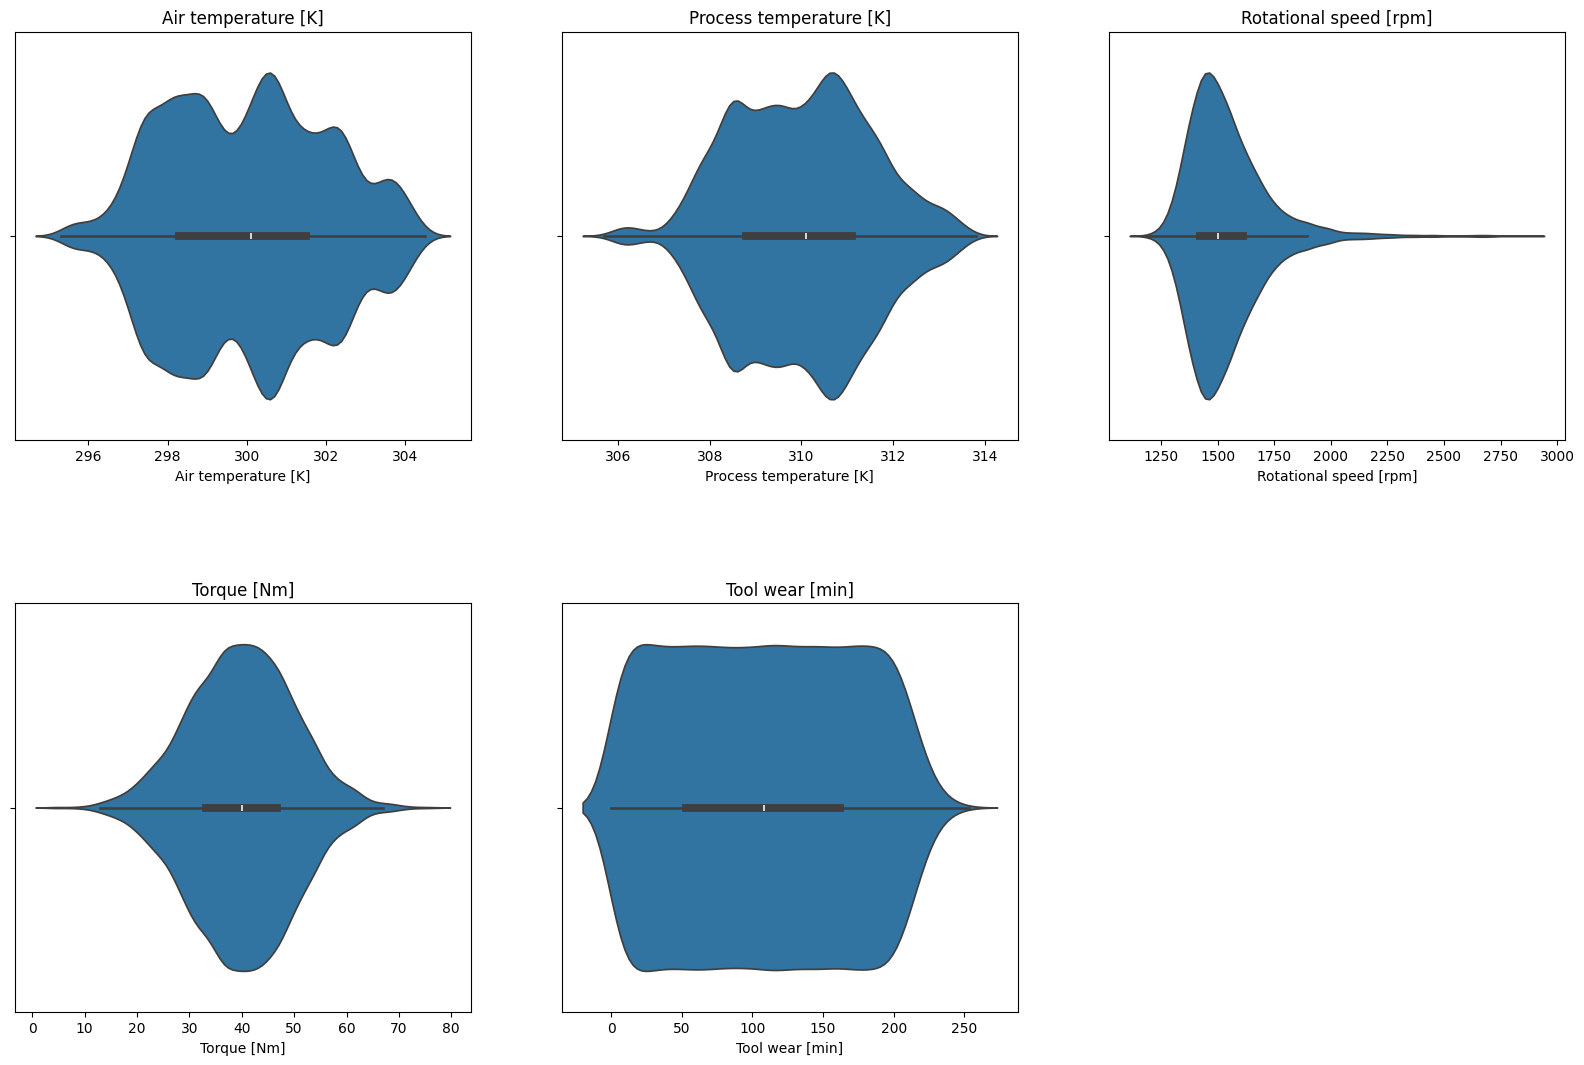

In [28]:
# numerical column 별 분포 확인
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numerical_columns:
    plt.subplot(2,3,x)
    x = x+1
    sns.violinplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [29]:
for column_name in list_numerical_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )

# 추후 scaling을 활용한 feature preprocessing의 필요성 확인

Air temperature [K] skew :  0.11425677871921017 kur :  -0.8361436902603159
Process temperature [K] skew :  0.015025013585136188 kur :  -0.5000844728185414
Rotational speed [rpm] skew :  1.9928720166048546 kur :  7.388649004260044
Torque [Nm] skew :  -0.009515168291199652 kur :  -0.01383393464278937
Tool wear [min] skew :  0.027288145044006527 kur :  -1.166753784684031


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

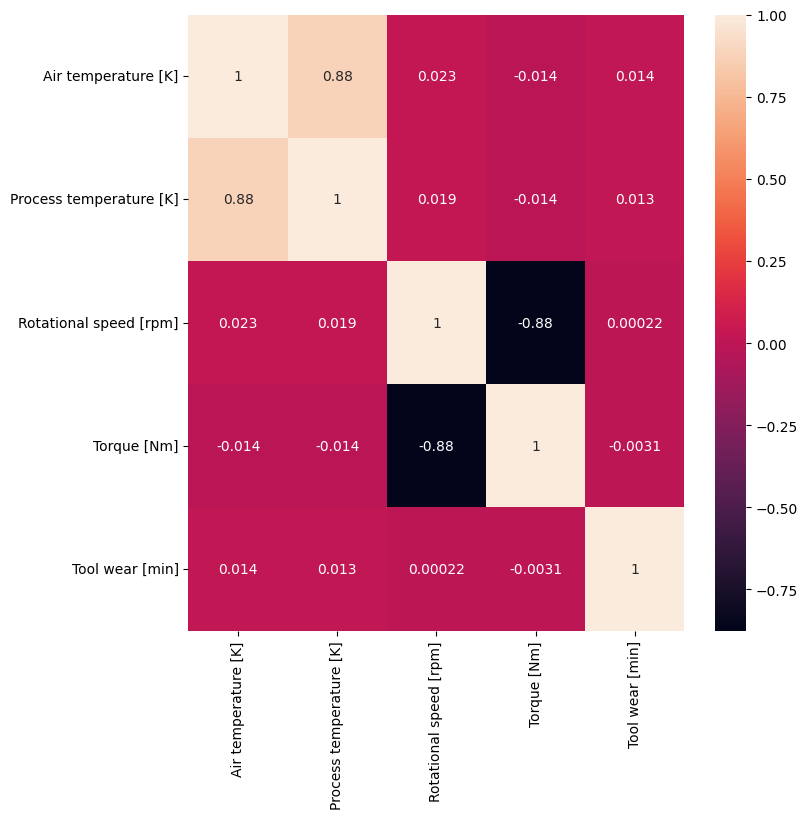

In [31]:
# 상관관계 분석
df_corr = df[list_numerical_columns + [target_column]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)

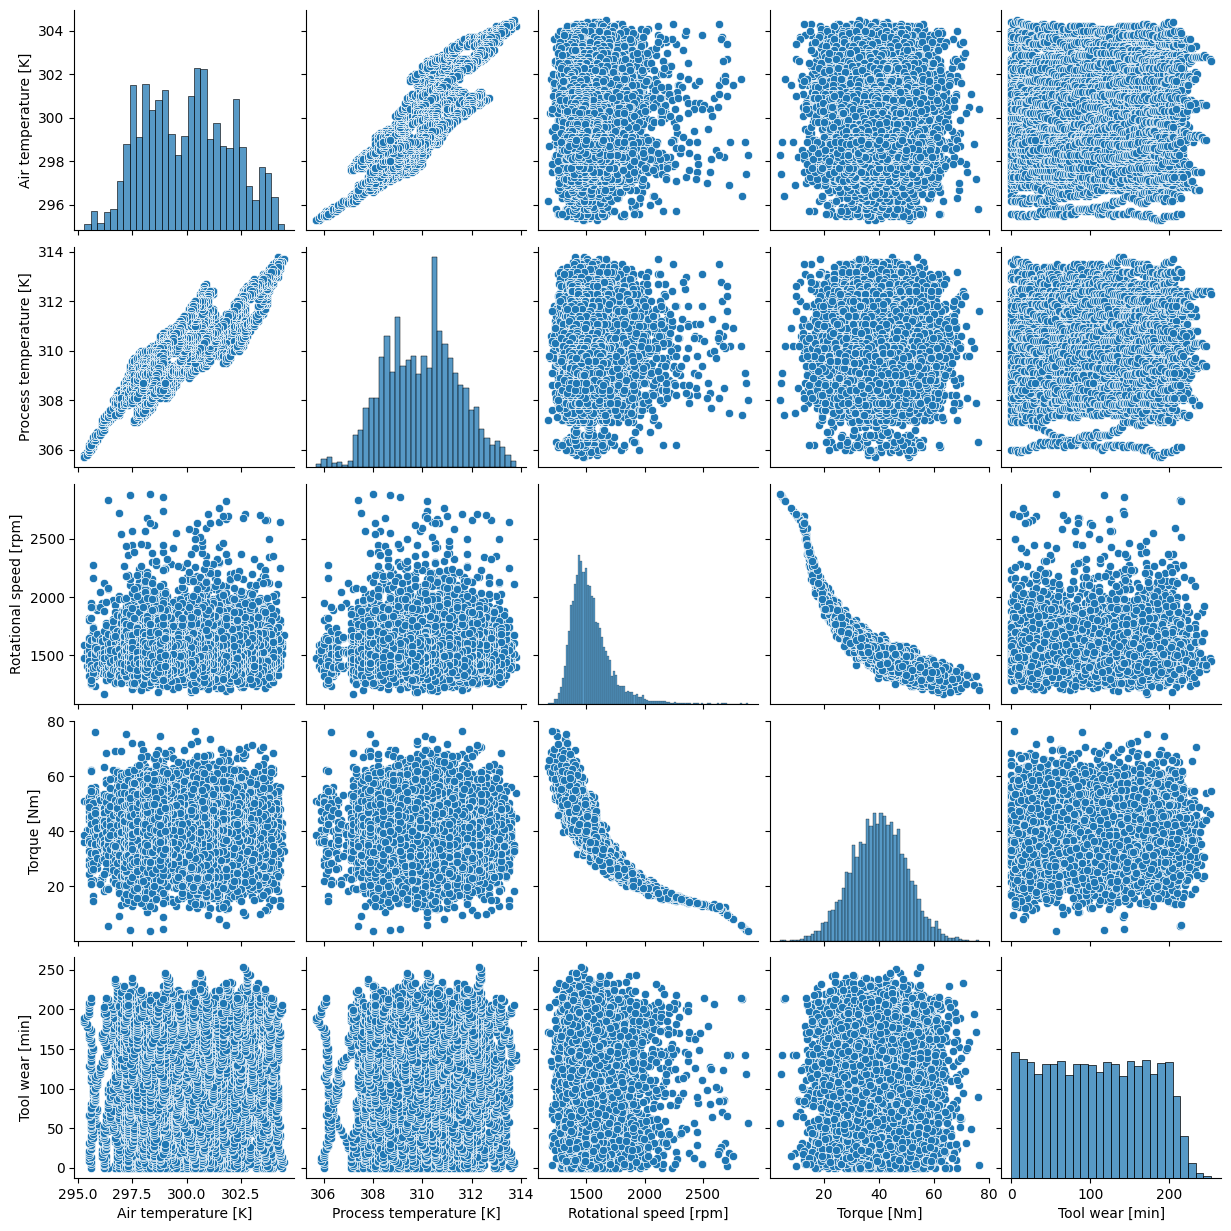

In [32]:
sns.pairplot(df[list_numerical_columns])

In [33]:
# Torque와 Rotational speed가 높은 상관관계를 갖음
# 해당 상관관계의 pvalue 검정

statistic, pvalue = stats.pearsonr(df["Torque [Nm]"], df["Rotational speed [rpm]"])
print(statistic, pvalue)

-0.875027086299607 0.0


In [34]:
def caculate_vif(df_target):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
  vif['Feature'] = df_target.columns
  return vif

df_vif = df[list_numerical_columns].copy()

In [35]:
df_vif_result = caculate_vif(df_vif)
df_vif_result

,VIF_Factor,Feature
0,87413.106376,Air temperature [K]
1,88285.242860,Process temperature [K]
2,315.329872,Rotational speed [rpm]
3,72.125192,Torque [Nm]
4,3.877244,Tool wear [min]


In [36]:
df_vif_result = caculate_vif(df_vif.drop(["Air temperature [K]","Rotational speed [rpm]"], axis=1))
df_vif_result

,VIF_Factor,Feature
0,19.994474,Process temperature [K]
1,17.075601,Torque [Nm]
2,3.876991,Tool wear [min]


In [38]:
# vif와 corrleation을 고려하여 두 개 데이터 제외하기로 결정
list_numerical_columns.remove("Air temperature [K]")
list_numerical_columns.remove("Rotational speed [rpm]")

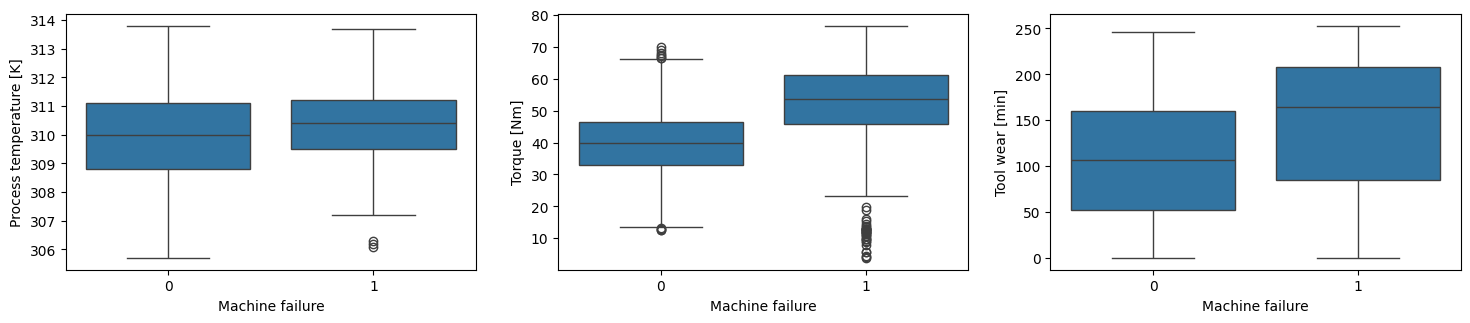

In [40]:
# target과 numerical column 관계 분포 확인
plt.figure(figsize=(18,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numerical_columns:
    plt.subplot(4,3,x)
    x = x + 1
    sns.boxplot(data=df,x=target_column,y=column_name)
plt.show()

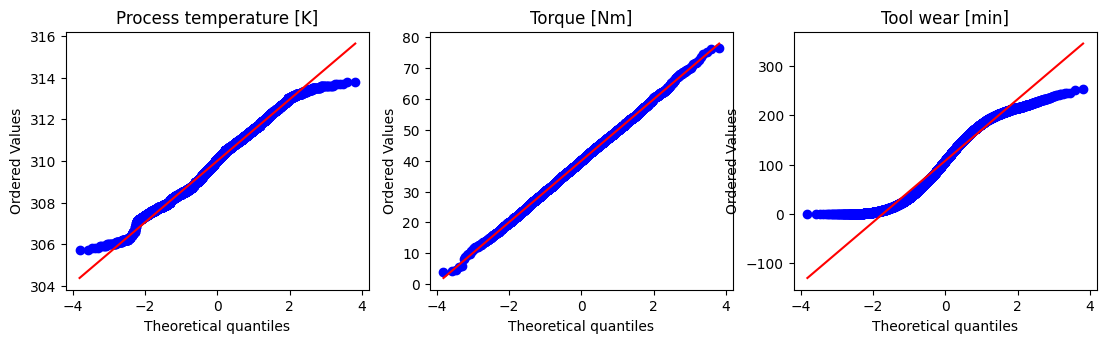

In [41]:
# ANOVA 분석을 위한 정규성 검정
# numerical column 정규성 확인
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numerical_columns:
    plt.subplot(3,4,x)
    x = x+1
    stats.probplot(df[column_name], dist=stats.norm, plot=plt)
    plt.title(column_name)
plt.show()

In [42]:
list_column_normality = []
for column_name in list_numerical_columns:
  statistic, pvalue = stats.shapiro(df[column_name])
  if pvalue >= 0.05:
    list_column_normality.append(column_name)
  print(column_name, ", statistic : ",statistic,", pvalue : ", pvalue)
print("정규성 만족하는 column 수 : ", len(list_column_normality))

Process temperature [K] , statistic :  0.9923928380012512 , pvalue :  1.1303529850749254e-22
Torque [Nm] , statistic :  0.9997695088386536 , pvalue :  0.356086790561676
Tool wear [min] , statistic :  0.9599173665046692 , pvalue :  0.0
정규성 만족하는 column 수 :  1


p-value may not be accurate for N > 5000.


In [43]:
# 정규성을 만족하는 변수만 추가 검정 진행
list_target_unique = df[target_column].unique()
list_by_quality_value = []
for quality_value in list_target_unique:
  df_tmp = df[df[target_column] == quality_value][column_name]
  list_by_quality_value.append(np.array(df_tmp))

bartlett(*list_by_quality_value)


BartlettResult(statistic=15.012150829301168, pvalue=0.00010682116683995105)

In [45]:
# 등분산성을 만족하지 못하므로, 비모수 검정 진행
list_target_unique = df[target_column].unique()
list_meaningful_column_by_kruskall = []

for column_name in list_numerical_columns:
  list_by_quality_value = []
  for quality_value in list_target_unique:
      df_tmp = df[df[target_column] == quality_value][column_name].dropna()
      list_by_quality_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_quality_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all numerical columns : ", len(list_numerical_columns))
print("selected columns by anova : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

Process temperature [K] ,  15.955233602795756 ,  6.485821109968368e-05
Torque [Nm] ,  286.98060634931943 ,  2.2618643221156073e-64
Tool wear [min] ,  103.27563708744904 ,  2.916174538620708e-24
all numerical columns :  3
selected columns by anova :  3 ['Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']


---
**Insight**
1.   y(종속 변수)와 numerical data는 모두 유의미한 관계를 갖음 (크루스칼 왈리스 검정)
2.   상관관계와 vif분석에서 제거하기로 결정한 변수 2개이며 제거 완료



### 22. Data Processing 2

### 22.1. 결측값 확인

In [46]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

### 22.2. Feature Selection

In [47]:
df_fs = df[list_meaningful_column_by_chi + list_numerical_columns + [target_column]]
df_fs.head(2)

,Type,Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,M,308.6,42.8,0,0
1,L,308.7,46.3,3,0


### 22.3. Feature Transformation

In [48]:
Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

In [49]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: object

In [51]:
# Label Encoding
Y = Y.astype("int64")

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Process temperature [K]  10000 non-null  float64
 2   Torque [Nm]              10000 non-null  float64
 3   Tool wear [min]          10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [53]:
list_categorical_columns = list(X.select_dtypes(include=['object']).columns)
list_numerical_columns = list(X.select_dtypes(include=['float64','int64']).columns)
print(len(list_categorical_columns))
print(len(list_numerical_columns))

1
3


In [54]:
X.head(1)

,Type,Process temperature [K],Torque [Nm],Tool wear [min]
0,M,308.6,42.8,0


In [55]:
scaler = MinMaxScaler()
X.loc[:, list_numerical_columns] = scaler.fit_transform(X[list_numerical_columns])
X.head(1)

,Type,Process temperature [K],Torque [Nm],Tool wear [min]
0,M,0.358025,0.535714,0.0


In [56]:
# One-hot Encoding for categorical column data
X_base = pd.get_dummies(X)
X_base.head(1)

,Process temperature [K],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.358025,0.535714,0.0,0,0,1


### 22.4. Sampling

In [57]:
X_train, X_validation, y_train, y_validation = train_test_split(X_base, Y, test_size=0.2, stratify=Y)

In [58]:
# SMOTE
sm = SMOTE(random_state=random_state)
X_sm_sampling, y_sm_sampling = sm.fit_resample(X_train, y_train)

In [59]:
y_train.value_counts()

0    7729
1     271
Name: Machine failure, dtype: int64

In [60]:
y_sm_sampling.value_counts()

0    7729
1    7729
Name: Machine failure, dtype: int64

In [61]:
# SVMSMOTE
svm_sm = SVMSMOTE(random_state=random_state)
X_svm_sampling, y_svm_sampling = svm_sm.fit_resample(X_train, y_train)

In [62]:
y_train.value_counts()

0    7729
1     271
Name: Machine failure, dtype: int64

In [63]:
y_svm_sampling.value_counts()

0    7729
1    7729
Name: Machine failure, dtype: int64

---
**Summary**
- 최종 생성 Feature는 아래와 같은 특성을 가짐
1. Feature Selection by Chi-test, correlation and kruskal-test
2. Feature Transformation
3. Sampling (oversampling)

-  Feature 종류
1. X_base, Y (No sampling, imbalanced data)
2. X_sm_sampling, Y_sm_sampling (smote oversampling)
3. X_svm_sampling, Y_svm_sampling (svm smote oversampling)


## 4. ML 분석
1. Base model without sampling
2. Model Optimization without sampling
3. Isolation Forest Optimization without sampling
4. model optimization with SMOTE Oversampling
5. model optimization with SVMSMOTE Oversampling

In [64]:
list_model_type = []
list_model_best_params = []
list_model_f1score = []
cv = 3
n_iter_randomsearch = 16

### 4.1. Base model without sampling

In [65]:
X_train_npy = np.array(X_train)
y_train_npy = np.array(y_train)

In [66]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X_train_npy, y_train_npy)

3

In [67]:
list_fold_result = []
for i, (train_index, test_index) in enumerate(skf.split(X_train_npy, y_train_npy)):
  X_train_cv, X_test_cv = X_train_npy[train_index], X_train_npy[test_index]
  y_train_cv, y_test_cv = y_train_npy[train_index], y_train_npy[test_index]
  rf_clf = RandomForestClassifier()
  rf_clf.fit(X_train_cv, y_train_cv)
  y_prd_test = rf_clf.predict(X_test_cv)
  y_prd_proba_test = rf_clf.predict_proba(X_test_cv)[:,-1]
  prf_score_test = precision_recall_fscore_support(y_test_cv, y_prd_test, average="macro")
  score_test = roc_auc_score(y_test_cv, y_prd_proba_test, average="macro")
  print(i, " precision, recall, f1score : ", prf_score_test)
  print(i, " roc_auc_score : ", score_test)

  y_prd_validation = rf_clf.predict(X_validation)
  y_prd_proba_validation = rf_clf.predict_proba(X_validation)[:,-1]
  prf_score_validation = precision_recall_fscore_support(y_validation, y_prd_validation, average="macro")
  score_validation = roc_auc_score(y_validation, y_prd_proba_validation, average="macro")
  print("validation : precision, recall, f1score : ",prf_score_validation)
  print("validation : roc_auc_score : ",score_validation)
  list_fold_result.append(prf_score_validation[2])

average_f1score = np.mean(list_fold_result)
print("average f1score : ",average_f1score)
list_model_type.append("Base model without sampling")
list_model_best_params.append({})
list_model_f1score.append(average_f1score)

0  precision, recall, f1score :  (0.8889607917776932, 0.6762255853059113, 0.7398125702122628, None)
0  roc_auc_score :  0.9317725175699565


X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


validation : precision, recall, f1score :  (0.9677800269905533, 0.6688588478869809, 0.744114636642784, None)
validation : roc_auc_score :  0.8903719096334184
1  precision, recall, f1score :  (0.8824091563230797, 0.7176451266125179, 0.7757194166540071, None)
1  roc_auc_score :  0.8774081120742612


X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


validation : precision, recall, f1score :  (0.8955792682926829, 0.6896236755571794, 0.7538461538461538, None)
validation : roc_auc_score :  0.8789542991109487
2  precision, recall, f1score :  (0.8670948323371063, 0.686753795721187, 0.7454058252980709, None)
2  roc_auc_score :  0.8547834713595583
validation : precision, recall, f1score :  (0.9086895263683874, 0.689882474729022, 0.7566021662407204, None)
validation : roc_auc_score :  0.8612570028011204
average f1score :  0.7515209855765527


X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


<Axes: >

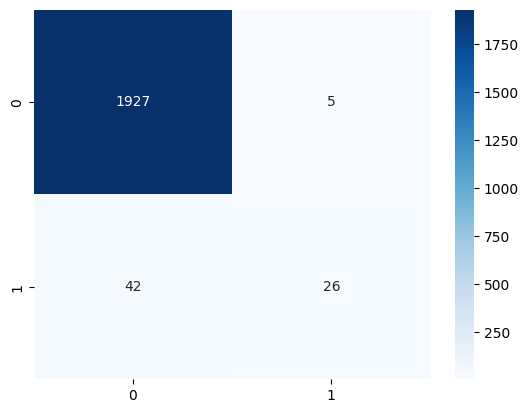

In [68]:
cm = pd.DataFrame(confusion_matrix(y_validation,y_prd_validation))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

### 4.2. Model optimization with base feature

In [69]:
def plot_roc_auc(y_true, y_prd_proba):
  fpr, tpr, _ = roc_curve(y_true,  y_prd_proba)
  auc = roc_auc_score(y_true, y_prd_proba)
  plt.figure(figsize=(7,7))
  plt.plot(fpr,tpr,label="auc="+str(auc))
  plt.legend(loc=4)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

In [70]:
def model_learning_with_randomsearch(model, hyper_parameter, X, Y, metric="roc_auc_ovr_weighted"):
  random_cv_opt = RandomizedSearchCV(estimator=model, param_distributions=hyper_parameter, n_iter=n_iter_randomsearch, cv = cv, random_state=random_state, scoring=metric, verbose=1)
  random_cv_opt.fit(X, Y)
  y_prd = random_cv_opt.predict(X_validation)
  prf_score = precision_recall_fscore_support(y_validation, y_prd, average="macro")
  y_prd_proba = random_cv_opt.predict_proba(X_validation)[:,-1]
  score = roc_auc_score(y_validation, y_prd_proba, average="macro")
  print('validation -> best model hyper-parameter : ', random_cv_opt.best_params_)
  print("validation -> precision, recall, f1score : ", prf_score)
  print("validation -> roc_auc_score : ", score)

  cm = pd.DataFrame(confusion_matrix(y_validation,y_prd))
  sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

  return random_cv_opt.best_params_, prf_score, score

Fitting 3 folds for each of 16 candidates, totalling 48 fits
validation -> best model hyper-parameter :  {'max_features': 0.9, 'max_depth': 8, 'class_weight': 'balanced_subsample'}
validation -> precision, recall, f1score :  (0.6177112290847333, 0.7891091219096334, 0.6586863773472106, None)
validation -> roc_auc_score :  0.9052680854950677


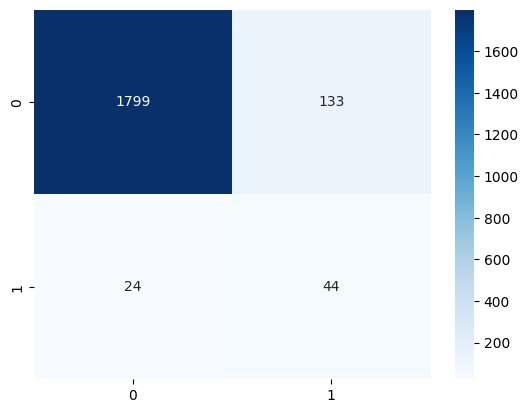

In [71]:
hyper_params_rlf = {
    "max_depth" : [8, 10, 15, 20],
    "class_weight" : ["balanced", "balanced_subsample"],
    "max_features" : [0.7, 0.8, 0.9]
              }
params, prf_score, score = model_learning_with_randomsearch(RandomForestClassifier(), hyper_params_rlf, X_train, y_train)
list_model_type.append("model optimization without sampling")
list_model_best_params.append(params)
list_model_f1score.append(prf_score[2])

### 4.3. Isolation Forest Optimization without sampling

In [72]:
def change_prediction_result(y_prd):
  return np.where(y_prd == 1, 0, 1)

if_clf = IsolationForest(n_estimators=100, max_samples='auto', max_features=0.9)
if_clf.fit(X_train)
y_prd = if_clf.predict(X_validation)

In [73]:
y_prd_changed = change_prediction_result(y_prd)
prf_score = precision_recall_fscore_support(y_validation, y_prd_changed, average="macro")

In [74]:
prf_score

(0.5238230680388202, 0.6683108025819023, 0.44843750000000004, None)

<Axes: >

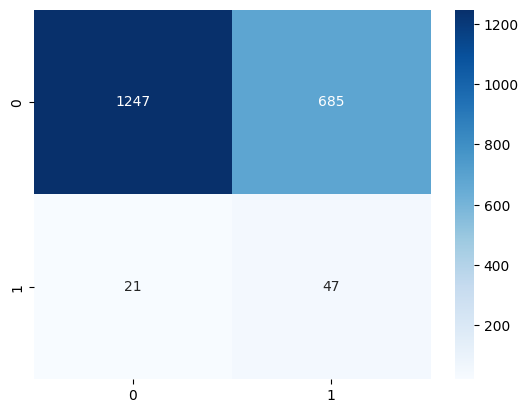

In [75]:
cm = pd.DataFrame(confusion_matrix(y_validation,y_prd_changed))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

In [76]:
list_model_type.append("Isolation Forest Optimization without sampling")
list_model_best_params.append({})
list_model_f1score.append(prf_score[2])

### 4.4. Model optimization with SMOTE oversampling

Fitting 3 folds for each of 16 candidates, totalling 48 fits
validation -> best model hyper-parameter :  {'max_features': 0.7, 'max_depth': 20, 'class_weight': 'balanced_subsample'}
validation -> precision, recall, f1score :  (0.6156993084131872, 0.7754384362440628, 0.655125995823687, None)
validation -> roc_auc_score :  0.8956696809158445


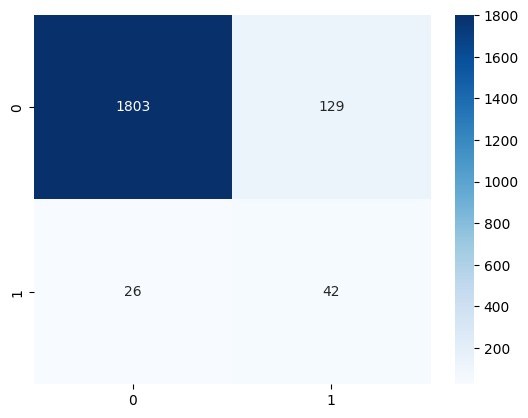

In [77]:
params, prf_score, score = model_learning_with_randomsearch(RandomForestClassifier(), hyper_params_rlf, X_sm_sampling, y_sm_sampling)
list_model_type.append("model optimization with smote oversampling")
list_model_best_params.append(params)
list_model_f1score.append(prf_score[2])

### 4.5. Model optimization with SVMSMOTE sampling

Fitting 3 folds for each of 16 candidates, totalling 48 fits
validation -> best model hyper-parameter :  {'max_features': 0.8, 'max_depth': 20, 'class_weight': 'balanced_subsample'}
validation -> precision, recall, f1score :  (0.6548350785728039, 0.7387194008037998, 0.6862745098039216, None)
validation -> roc_auc_score :  0.9021586895627817


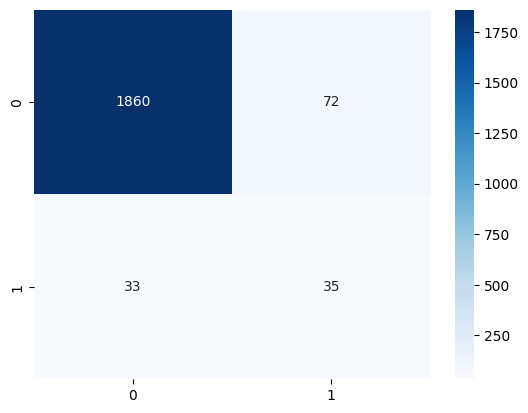

In [78]:
params, prf_score, score = model_learning_with_randomsearch(RandomForestClassifier(), hyper_params_rlf, X_svm_sampling, y_svm_sampling)
list_model_type.append("model optimization with smoteenn combined oversampling")
list_model_best_params.append(params)
list_model_f1score.append(prf_score[2])

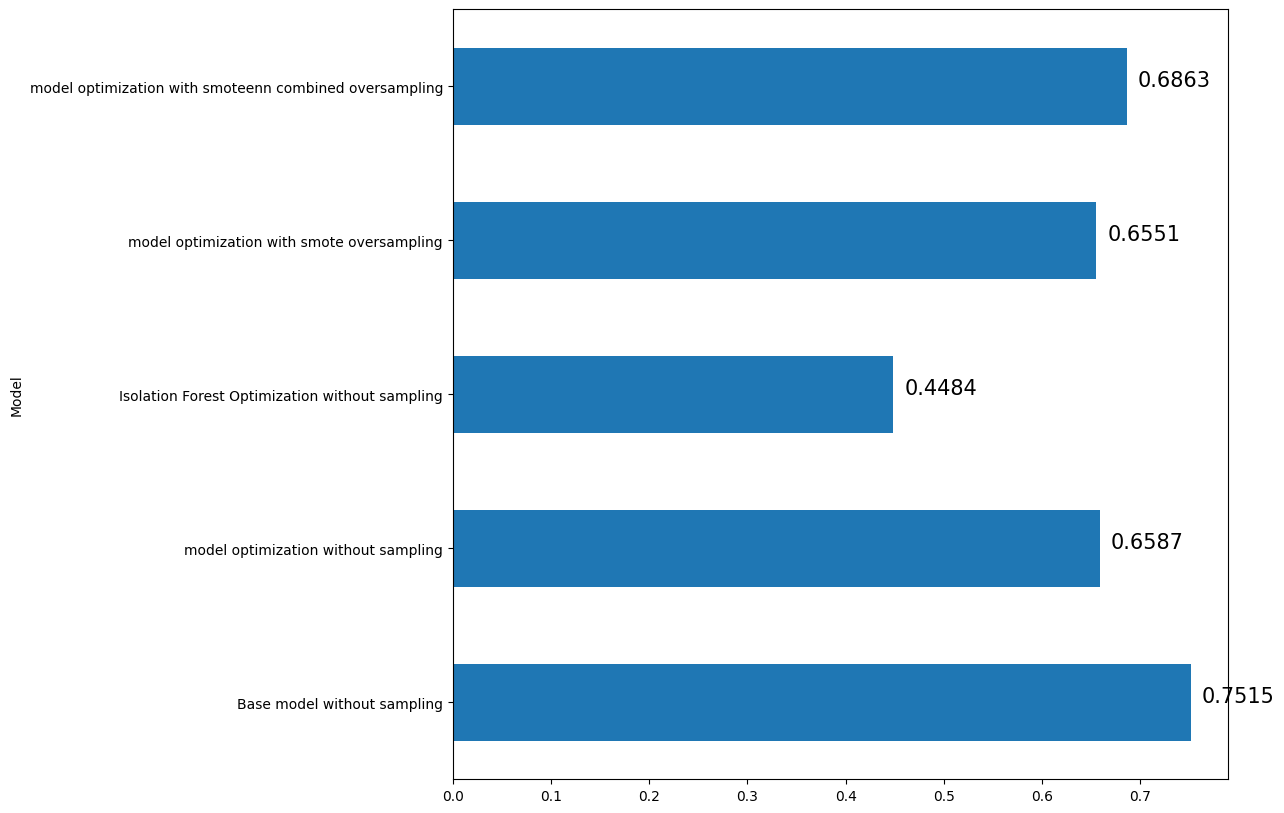

In [79]:
df_metric = pd.DataFrame({'Model':list_model_type, 'f1score_macro':list_model_f1score})
ax = df_metric.plot.barh(x='Model', y='f1score_macro', rot=0, figsize=(10,10), legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   size=15, xytext=(8, 0),
                   textcoords='offset points')

### 4.6. Model Metrics

In [80]:
# reproduction
rf_final = RandomForestClassifier()
rf_final.fit(X_train, y_train)

RandomForestClassifier()

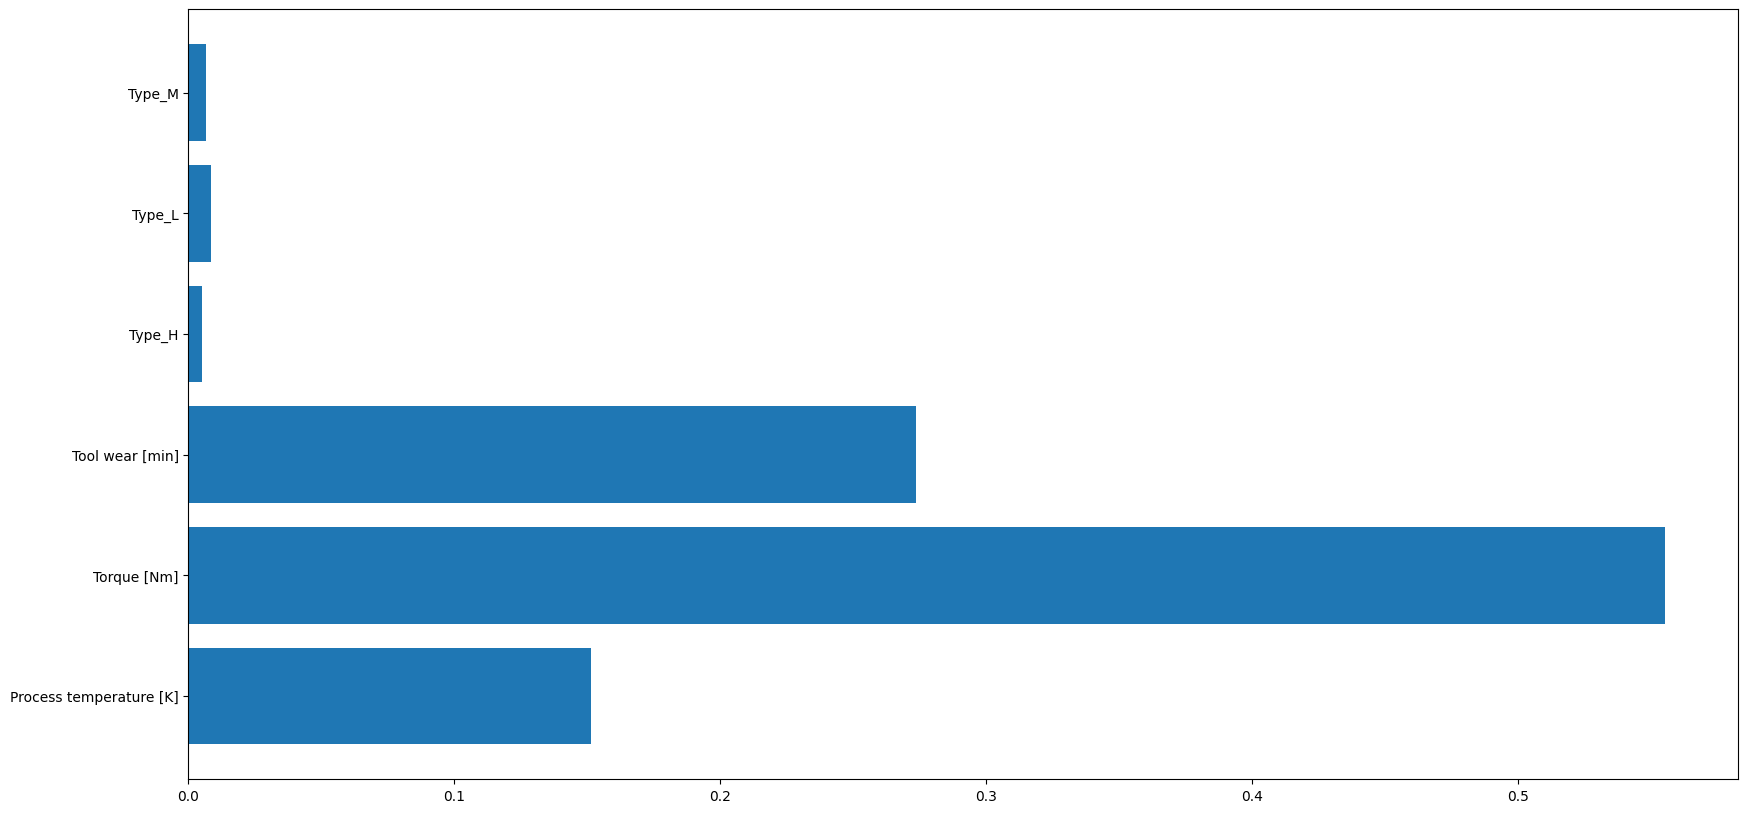

In [81]:
plt.figure(figsize=(20,10))
ax = plt.barh(list(X_validation.columns),rf_final.feature_importances_)

In [82]:
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_validation)

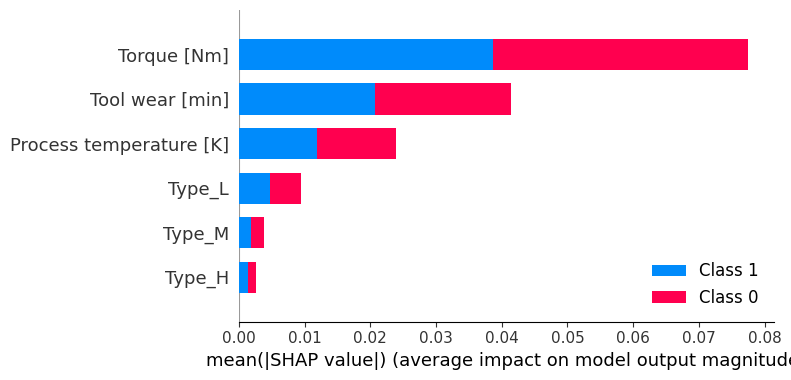

In [83]:
shap.summary_plot(shap_values, X_validation)

---
결론
- 개발 실패에 가장 영향을 주는 요소들을 확인함(Class 1: 실패)
- Torque, Tool wear, Process temperature 값이 높을수록 실패를 예측함
- 데이터 분석 관련 기술 및 지식만큼, 도메인의 지식도 중요하다는 것을 인지할 수 있었음